In [ ]:
import random
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
import io

uploaded = files.upload()


Saving temperature.csv to temperature (1).csv


In [ ]:
df = pd.read_csv(io.StringIO(uploaded['temperature.csv'].decode('utf-8')), header=None )
df

0     1
0     2020-04-26T03:50:00  14.0
1     2020-03-10T05:00:00  14.0
2     2020-03-21T22:50:00  12.0
3     2020-03-17T13:20:00  16.0
4     2020-03-06T01:20:00  14.0
...                   ...   ...
4352  2020-03-21T01:50:00  12.0
4353  2020-04-13T10:00:00  18.0
4354  2020-03-16T23:20:00  15.0
4355  2020-04-28T10:20:00  15.0
4356  2020-04-25T18:20:00  14.0

[4357 rows x 2 columns]

In [ ]:
df.columns = ["timestamp","Temperatura"]
df

timestamp  Temperatura
0     2020-04-26T03:50:00         14.0
1     2020-03-10T05:00:00         14.0
2     2020-03-21T22:50:00         12.0
3     2020-03-17T13:20:00         16.0
4     2020-03-06T01:20:00         14.0
...                   ...          ...
4352  2020-03-21T01:50:00         12.0
4353  2020-04-13T10:00:00         18.0
4354  2020-03-16T23:20:00         15.0
4355  2020-04-28T10:20:00         15.0
4356  2020-04-25T18:20:00         14.0

[4357 rows x 2 columns]

In [ ]:
import matplotlib
%matplotlib inline

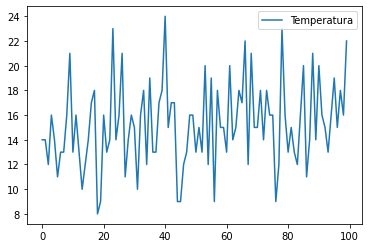

In [ ]:
df[:100].plot()

In [ ]:
def to_fahrenheit(celsius):
  return (celsius * 9./5. ) + 32.

In [ ]:
df['Temperatura'].map(to_fahrenheit)[:5]

0    57.2
1    57.2
2    53.6
3    60.8
4    57.2
Name: Temperatura, dtype: float64

In [ ]:
df['temperature F'] = df['Temperatura'].map(to_fahrenheit)

In [ ]:
df.head()

timestamp  Temperatura  temperature F
0  2020-04-26T03:50:00         14.0           57.2
1  2020-03-10T05:00:00         14.0           57.2
2  2020-03-21T22:50:00         12.0           53.6
3  2020-03-17T13:20:00         16.0           60.8
4  2020-03-06T01:20:00         14.0           57.2

In [ ]:
df['temperature F_v2'] = df['Temperatura'].apply(lambda x: (x * 9./5.) + 32.)

In [ ]:
df.head()

timestamp  Temperatura  temperature F  temperature F_v2
0  2020-04-26T03:50:00         14.0           57.2              57.2
1  2020-03-10T05:00:00         14.0           57.2              57.2
2  2020-03-21T22:50:00         12.0           53.6              53.6
3  2020-03-17T13:20:00         16.0           60.8              60.8
4  2020-03-06T01:20:00         14.0           57.2              57.2

In [ ]:
df.describe

<bound method NDFrame.describe of                 timestamp  Temperatura  temperature F  temperature F_v2
0     2020-04-26T03:50:00         14.0           57.2              57.2
1     2020-03-10T05:00:00         14.0           57.2              57.2
2     2020-03-21T22:50:00         12.0           53.6              53.6
3     2020-03-17T13:20:00         16.0           60.8              60.8
4     2020-03-06T01:20:00         14.0           57.2              57.2
...                   ...          ...            ...               ...
4352  2020-03-21T01:50:00         12.0           53.6              53.6
4353  2020-04-13T10:00:00         18.0           64.4              64.4
4354  2020-03-16T23:20:00         15.0           59.0              59.0
4355  2020-04-28T10:20:00         15.0           59.0              59.0
4356  2020-04-25T18:20:00         14.0           57.2              57.2

[4357 rows x 4 columns]>

In [ ]:
df['ruleoftumb'] = df['temperature F'] / df['Temperatura']

In [ ]:
df

timestamp  Temperatura  ...  temperature F_v2  ruleoftumb
0     2020-04-26T03:50:00         14.0  ...              57.2    4.085714
1     2020-03-10T05:00:00         14.0  ...              57.2    4.085714
2     2020-03-21T22:50:00         12.0  ...              53.6    4.466667
3     2020-03-17T13:20:00         16.0  ...              60.8    3.800000
4     2020-03-06T01:20:00         14.0  ...              57.2    4.085714
...                   ...          ...  ...               ...         ...
4352  2020-03-21T01:50:00         12.0  ...              53.6    4.466667
4353  2020-04-13T10:00:00         18.0  ...              64.4    3.577778
4354  2020-03-16T23:20:00         15.0  ...              59.0    3.933333
4355  2020-04-28T10:20:00         15.0  ...              59.0    3.933333
4356  2020-04-25T18:20:00         14.0  ...              57.2    4.085714

[4357 rows x 5 columns]

In [ ]:
df['ruleoftumb'].describe()

count    4354.000000
mean        3.988127
std         0.709916
min         2.985185
25%         3.577778
50%         3.933333
75%         4.261538
max        17.800000
Name: ruleoftumb, dtype: float64

In [ ]:
df.describe()

Temperatura  temperature F  temperature F_v2   ruleoftumb
count  4354.000000    4354.000000       4354.000000  4354.000000
mean     15.590951      60.063712         60.063712     3.988127
std       3.596220       6.473197          6.473197     0.709916
min       2.000000      35.600000         35.600000     2.985185
25%      13.000000      55.400000         55.400000     3.577778
50%      15.000000      59.000000         59.000000     3.933333
75%      18.000000      64.400000         64.400000     4.261538
max      27.000000      80.600000         80.600000    17.800000

In [ ]:
df.rename(columns={'Temperatura': 'temperature'}, inplace=True)

In [ ]:
df

timestamp  temperature  ...  temperature F_v2  bad_rule
0     2020-04-26T03:50:00         14.0  ...              57.2  4.085714
1     2020-03-10T05:00:00         14.0  ...              57.2  4.085714
2     2020-03-21T22:50:00         12.0  ...              53.6  4.466667
3     2020-03-17T13:20:00         16.0  ...              60.8  3.800000
4     2020-03-06T01:20:00         14.0  ...              57.2  4.085714
...                   ...          ...  ...               ...       ...
4352  2020-03-21T01:50:00         12.0  ...              53.6  4.466667
4353  2020-04-13T10:00:00         18.0  ...              64.4  3.577778
4354  2020-03-16T23:20:00         15.0  ...              59.0  3.933333
4355  2020-04-28T10:20:00         15.0  ...              59.0  3.933333
4356  2020-04-25T18:20:00         14.0  ...              57.2  4.085714

[4357 rows x 5 columns]

In [ ]:
df.drop('temperature F_v2', axis=1, inplace=True)
df.head()

KeyError: ignored

In [ ]:
df.groupby('temperature').count()

timestamp  temperature F
temperature                          
2.0                  1              1
3.0                  8              8
4.0                  1              1
5.0                  6              6
6.0                  7              7
7.0                 25             25
8.0                 29             29
9.0                 69             69
10.0               143            143
11.0               233            233
12.0               242            242
13.0               454            454
14.0               552            552
15.0               464            464
16.0               503            503
17.0               368            368
18.0               371            371
19.0               240            240
20.0               233            233
21.0               134            134
22.0               120            120
23.0                74             74
24.0                39             39
25.0                23             23
26.0                 8              8
27.0                 7              7

In [ ]:
df['deviation'] = df['temperature'] - df['temperature'].mean()
df.head()

timestamp  temperature  temperature F  deviation
0  2020-04-26T03:50:00         14.0           57.2  -1.590951
1  2020-03-10T05:00:00         14.0           57.2  -1.590951
2  2020-03-21T22:50:00         12.0           53.6  -3.590951
3  2020-03-17T13:20:00         16.0           60.8   0.409049
4  2020-03-06T01:20:00         14.0           57.2  -1.590951

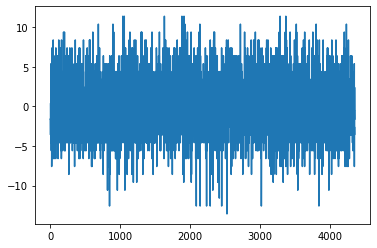

In [ ]:
df['deviation'].plot()

In [ ]:
df.index = pd.to_datetime(df['timestamp'])

In [ ]:
df.head()

timestamp  temperature  temperature F  deviation
timestamp                                                                      
2020-04-26 03:50:00  2020-04-26T03:50:00         14.0           57.2  -1.590951
2020-03-10 05:00:00  2020-03-10T05:00:00         14.0           57.2  -1.590951
2020-03-21 22:50:00  2020-03-21T22:50:00         12.0           53.6  -3.590951
2020-03-17 13:20:00  2020-03-17T13:20:00         16.0           60.8   0.409049
2020-03-06 01:20:00  2020-03-06T01:20:00         14.0           57.2  -1.590951

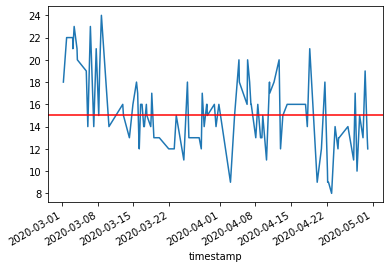

In [ ]:
ax = df['temperature'][:100].plot()
ax.axhline(df[:100]['temperature'].median(), color='r', linestyle='-')

In [ ]:
df[df['temperature'].isnull()]

timestamp  temperature  temperature F  deviation
timestamp                                                                      
2020-04-09 03:50:00  2020-04-09T03:50:00          NaN            NaN        NaN
2020-04-15 10:00:00  2020-04-15T10:00:00          NaN            NaN        NaN
2020-03-27 05:00:00  2020-03-27T05:00:00          NaN            NaN        NaN

In [ ]:
df['temperature'].isnull()[2350:2360]

timestamp
2020-03-24 10:20:00    False
2020-04-14 02:20:00    False
2020-04-29 05:00:00    False
2020-03-10 12:00:00    False
2020-03-27 05:00:00     True
2020-04-28 12:50:00    False
2020-03-05 01:00:00    False
2020-04-15 12:20:00    False
2020-03-27 00:20:00    False
2020-03-24 14:50:00    False
Name: temperature, dtype: bool

In [ ]:
df['temperature'].isnull().any()

True

In [ ]:
df.dropna(axis=0, inplace=True)
df['temperature'].isnull().any()
df.describe()

temperature  temperature F     deviation
count  4354.000000    4354.000000  4.354000e+03
mean     15.590951      60.063712 -1.627443e-15
std       3.596220       6.473197  3.596220e+00
min       2.000000      35.600000 -1.359095e+01
25%      13.000000      55.400000 -2.590951e+00
50%      15.000000      59.000000 -5.909508e-01
75%      18.000000      64.400000  2.409049e+00
max      27.000000      80.600000  1.140905e+01

In [ ]:
df.groupby(df.index.date).count()

timestamp  temperature  temperature F  deviation
2020-03-01         72           72             72         72
2020-03-02         72           72             72         72
2020-03-03         70           70             70         70
2020-03-04         72           72             72         72
2020-03-05         68           68             68         68
...               ...          ...            ...        ...
2020-04-26         72           72             72         72
2020-04-27         72           72             72         72
2020-04-28         72           72             72         72
2020-04-29         72           72             72         72
2020-04-30         72           72             72         72

[61 rows x 4 columns]

In [ ]:
df.groupby(df.index.date).count().describe()

timestamp  temperature  temperature F  deviation
count  61.000000    61.000000      61.000000  61.000000
mean   71.377049    71.377049      71.377049  71.377049
std     1.127888     1.127888       1.127888   1.127888
min    67.000000    67.000000      67.000000  67.000000
25%    71.000000    71.000000      71.000000  71.000000
50%    72.000000    72.000000      72.000000  72.000000
75%    72.000000    72.000000      72.000000  72.000000
max    72.000000    72.000000      72.000000  72.000000

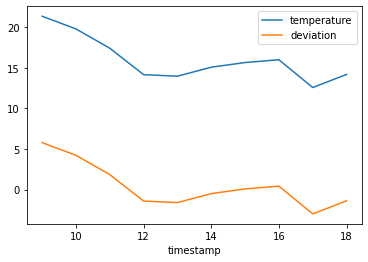

In [ ]:
df[['temperature','deviation']].groupby(df.index.week).mean().plot()

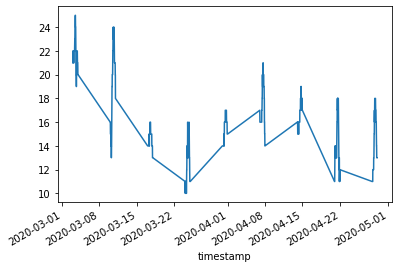

In [ ]:
df[df.index.weekday == True]['temperature'].plot()

In [ ]:
df['weekday'] = df.index.weekday
df.head()

timestamp  temperature  ...  deviation  weekday
timestamp                                              ...                    
2020-04-26 03:50:00  2020-04-26T03:50:00         14.0  ...  -1.590951        6
2020-03-10 05:00:00  2020-03-10T05:00:00         14.0  ...  -1.590951        1
2020-03-21 22:50:00  2020-03-21T22:50:00         12.0  ...  -3.590951        5
2020-03-17 13:20:00  2020-03-17T13:20:00         16.0  ...   0.409049        1
2020-03-06 01:20:00  2020-03-06T01:20:00         14.0  ...  -1.590951        4

[5 rows x 5 columns]

In [ ]:
df['weekend'] = df['weekday'].isin({5, 6})
df.head()

timestamp  temperature  ...  weekday  weekend
timestamp                                              ...                  
2020-04-26 03:50:00  2020-04-26T03:50:00         14.0  ...        6     True
2020-03-10 05:00:00  2020-03-10T05:00:00         14.0  ...        1    False
2020-03-21 22:50:00  2020-03-21T22:50:00         12.0  ...        5     True
2020-03-17 13:20:00  2020-03-17T13:20:00         16.0  ...        1    False
2020-03-06 01:20:00  2020-03-06T01:20:00         14.0  ...        4    False

[5 rows x 6 columns]

In [ ]:
df.groupby(['weekend', df.index.hour])['temperature'].mean()

weekend  timestamp
False    0            13.803030
         1            13.503817
         2            13.386364
         3            13.257812
         4            13.130769
         5            13.000000
         6            12.908397
         7            13.320611
         8            14.221374
         9            15.346154
         10           16.404580
         11           17.098485
         12           17.763359
         13           18.176923
         14           18.353846
         15           18.392308
         16           18.407692
         17           18.189394
         18           17.607692
         19           16.823077
         20           15.931818
         21           15.130769
         22           14.554688
         23           14.015152
True     0            13.627451
         1            13.254902
         2            13.098039
         3            12.823529
         4            12.480000
         5            12.260000
         6           

In [ ]:
df.groupby(['weekend', df.index.data])['temperature'].mean().unstack(level=0).plot()

AttributeError: ignored

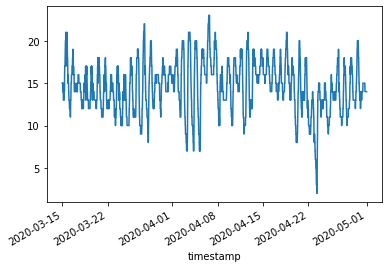

In [ ]:
df['2020-03-15':'2020-04']['temperature'].plot()

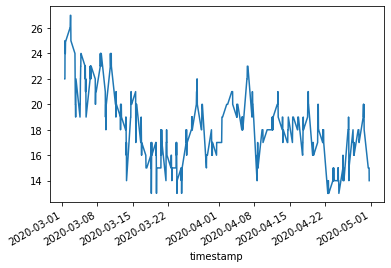

In [ ]:
df[ ((df.index.hour > 12) & (df.index.hour < 18))  ]['temperature'].plot()

In [ ]:
df.resample('120min').mean().head()


temperature  temperature F  deviation  weekday  weekend
timestamp                                                                   
2020-03-01 00:00:00    18.166667           64.7   2.575716        6     True
2020-03-01 02:00:00    18.333333           65.0   2.742382        6     True
2020-03-01 04:00:00    17.500000           63.5   1.909049        6     True
2020-03-01 06:00:00    18.166667           64.7   2.575716        6     True
2020-03-01 08:00:00    20.500000           68.9   4.909049        6     True

In [ ]:
df['temperature'].resample('D').agg(['min','max','mean'])

min   max       mean
timestamp                        
2020-03-01  17.0  25.0  21.375000
2020-03-02  19.0  27.0  22.722222
2020-03-03  19.0  25.0  21.757143
2020-03-04  15.0  24.0  19.444444
2020-03-05  13.0  23.0  17.750000
...          ...   ...        ...
2020-04-26  11.0  19.0  14.750000
2020-04-27  10.0  18.0  13.166667
2020-04-28  11.0  18.0  14.208333
2020-04-29  12.0  20.0  15.291667
2020-04-30  12.0  15.0  14.125000

[61 rows x 3 columns]

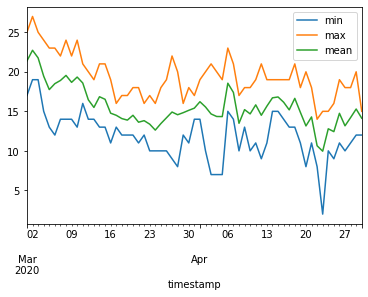

In [ ]:
df['temperature'].resample('D').agg(['min','max','mean']).plot()

In [ ]:
import random
N = 1200
index = pd.date_range('1/1/2020', periods=N, freq='S')
series = pd.Series([random.randint(0,100) for p in range(N)], index=index)
series

count    1200.000000
mean       48.945833
std        29.381042
min         0.000000
25%        23.000000
50%        48.500000
75%        74.000000
max       100.000000
dtype: float64

In [ ]:
resampled = series.resample('5T', label='right', closed='right').mean()

In [ ]:
resampled

2020-01-01 00:00:00    44.000000
2020-01-01 00:05:00    50.526667
2020-01-01 00:10:00    47.103333
2020-01-01 00:15:00    47.480000
2020-01-01 00:20:00    50.695652
Freq: 5T, dtype: float64

In [ ]:
upsampled = resampled.resample('90S').mean()[:6]
upsampled

2020-01-01 00:00:00    44.000000
2020-01-01 00:01:30          NaN
2020-01-01 00:03:00          NaN
2020-01-01 00:04:30    50.526667
2020-01-01 00:06:00          NaN
2020-01-01 00:07:30          NaN
Freq: 90S, dtype: float64

In [ ]:
upsampled = resampled.resample('25S').pad()[:20]
upsampled

2020-01-01 00:00:00    44.000000
2020-01-01 00:00:25    44.000000
2020-01-01 00:00:50    44.000000
2020-01-01 00:01:15    44.000000
2020-01-01 00:01:40    44.000000
2020-01-01 00:02:05    44.000000
2020-01-01 00:02:30    44.000000
2020-01-01 00:02:55    44.000000
2020-01-01 00:03:20    44.000000
2020-01-01 00:03:45    44.000000
2020-01-01 00:04:10    44.000000
2020-01-01 00:04:35    44.000000
2020-01-01 00:05:00    50.526667
2020-01-01 00:05:25    50.526667
2020-01-01 00:05:50    50.526667
2020-01-01 00:06:15    50.526667
2020-01-01 00:06:40    50.526667
2020-01-01 00:07:05    50.526667
2020-01-01 00:07:30    50.526667
2020-01-01 00:07:55    50.526667
Freq: 25S, dtype: float64

In [191]:
df['temperature'][:10]

timestamp
2020-04-26 03:50:00    14.0
2020-03-10 05:00:00    14.0
2020-03-21 22:50:00    12.0
2020-03-17 13:20:00    16.0
2020-03-06 01:20:00    14.0
2020-04-27 06:50:00    11.0
2020-03-25 21:50:00    13.0
2020-03-14 05:20:00    13.0
2020-04-14 05:20:00    16.0
2020-03-03 02:50:00    21.0
Name: temperature, dtype: float64

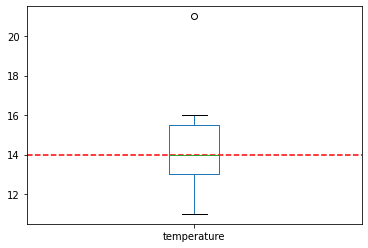

In [190]:
ax = df['temperature'][:10].plot(kind='box')
ax.axhline(14.0,color='r', ls='--')

In [196]:
df['temperature'][:1000].plot(kind='kde')

In [197]:
df['temperature'][:10].plot(kind='area')

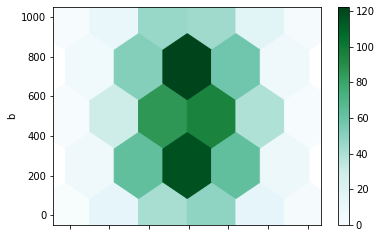

In [207]:
dfh = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
dfh['b'] = dfh['b'] + np.arange(1000)
dfh.plot.hexbin(x='a', y='b', gridsize=5)